In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [9]:
df = pd.read_csv('../Data/DataCancer/combine-feature.csv')
x = df[["pNN50", "HF"]]
y = df["Class"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
dt = DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    max_features='sqrt',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    ccp_alpha=0.1,
    class_weight='balanced',
    random_state=42
)

dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

<Figure size 500x400 with 0 Axes>

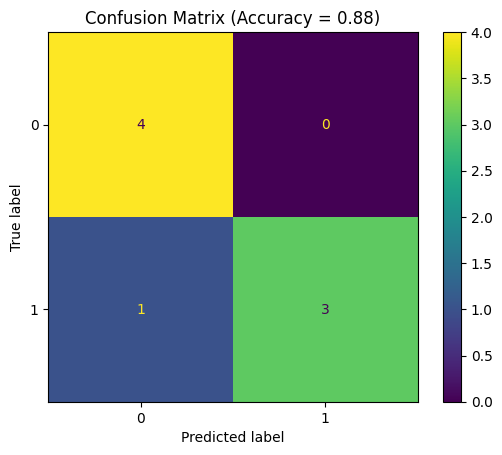

In [11]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f"Confusion Matrix (Accuracy = {accuracy:.2f})")
plt.show()


In [6]:
loo = LeaveOneOut()
scores = cross_val_score(dt, x, y, cv=loo).mean()
print("Cross-Validation Scores:", scores)

Cross-Validation Scores: 0.8918918918918919


In [6]:
from micromlgen import port

c_code = port(dt)
print(c_code)

with open("decisiontree_model.h", "w") as f:
    f.write(c_code)


#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class DecisionTree {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        if (x[0] <= 1.9009275436401367) {
                            if (x[0] <= 0.42482107877731323) {
                                if (x[1] <= -0.26795494556427) {
                                    return 1;
                                }

                                else {
                                    return 0;
                                }
                            }

                            else {
                                if (x[1] <= 0.5605651140213013) {
                                    return 1;
                                }

                                else {
                                    return 0;
               

In [7]:
print("\n📏 Mean dan Scale (untuk normalisasi di Arduino):")
print("Mean:", list(scaler.mean_))
print("Scale:", list(scaler.scale_))


📏 Mean dan Scale (untuk normalisasi di Arduino):
Mean: [np.float64(6.758620689655173), np.float64(203.151724137931)]
Scale: [np.float64(8.80695325772255), np.float64(320.2095161314936)]
